# Gain scheduling
In this notebook the topic of gain scheduling is studied.
## Preparation
Study the relevant chapters in
- "Predictive and Adaptive Control" R. Johansson 
- Chapter 9 "Adaptive Control" K.J. Åström
- [Slides from control system synthesis](http://www.control.lth.se/media/Education/DoctorateProgram/2016/Control%20System%20Synthesis/gainscheduling.pdf)

## The processes
The processes studied in this session are second order systems with two poles in $s=-0.5$
$$P(s) = \dfrac{1}{(2s+1)^2}$$
with or without input nonlinearity.

## Installation
The following code only has to be run once, it installs the relevant packages.

In [1]:
if false
    Pkg.add("GR")
    Pkg.add("ControlSystems")
    Pkg.checkout("ControlSystems","gainscheduling")
    Pkg.clone("https://github.com/JuliaGizmos/WebIO.jl")
    Pkg.checkout("Observables")
    Pkg.clone("https://github.com/JuliaGizmos/Vue.jl")
    Pkg.clone("https://github.com/JuliaGizmos/CSSUtil.jl")
    Pkg.clone("https://github.com/JuliaGizmos/InteractNext.jl")
end

The code below must be run once every time the kernel is restarted

In [ ]:
using WebIO
WebIO.devsetup()
WebIO.bundlejs(watch=false)
using ControlSystems, OrdinaryDiffEq, InteractNext
gr(show=false, size=(800,400)) # Set defaults for plotting

We now proceed to define the process model and some parameters for our simulation

In [35]:
P              = tf(1,[2.,1])^2*tf(1,[5.,1])  # Process model
h              = 0.1             # Sample time (only used for plots)
Tf             = 20              # Length of experiments (seconds)
t              = 0:h:Tf          # Time vector
Ps             = ss(P)           # State-space representation of process model
reference(t,x) = 1.;             # Reference generator (step function)

Next we define a simulation object and simulate the system with a P-controller. Change the value of the gain $K$ using the slider and try to get a feelig for how the system behaves.

In [36]:
s      = Simulator(Ps)
x0     = [0.,0,0] # Initial state
tspan  = (0.0,Tf)

@manipulate for K = linspace(0,20,50)
    global os, sol1
    os     = OutputFeedbackSimulator(Ps,reference,e->K*e)
    sol1   = solve(os, x0, tspan, Tsit5()) # Simulate the system
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

(div
  (div)
  (WebIO.Widget("context-196", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_133", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=

Let's step up the game and control the system with a PI controller. Try to tune the parameters to get a fast and well-damped step response.

In [37]:
conditions  = [(x,y,r) -> true]
tspan       = (0.0,Tf)
x0          = [0.,0,0]

@manipulate for kp = slider(linspace(0,10,50), label="kp", value=5),
                ki = slider(linspace(0,5,50), label="ki", value=1),
                kd = slider(linspace(0,20,50), label="kd", value=5)
    controllers = [pid(kp=kp, ki=ki, kd=kd)]
    global gs, sol1, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!(t, gs.y(t, sol2)[:], lab="PI controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

(div
  (div)
  (div)
  (div)
  (WebIO.Widget("context-202", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_138", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<polyline clip-path=\"url(#

We now introduce gain scheduling. The following code defines two controllers and a vector of conditions that determine when to switch between the controllers. The switching conditions are allowed to be arbitrary functions of the state $x$, the output $y$ or the reference $r$. The template below implements a schedule based on a simple threshold value on the output, $y=th$. Experiment with the controller parameters of the two controllers and the scheduling signal. Anser the following questions
- Which signal is best for scheduling?
- Can you implement a controller which is both faster and has better damping than your best controller from the previous task?

In [16]:
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=5),
                ki1 = slider(linspace(0,5,50), label="ki1", value=1),
                kp2 = slider(linspace(0,20,50), label="kp2", value=5),
                ki2 = slider(linspace(0,5,50), label="ki2", value=1),
                kd  = slider(linspace(0,20,50), label="kd", value=5),
                th  = linspace(0,1,20)
    
    global gs
    plot(t, gs.y(t, sol2)[:], lab="PID controller")

    controllers  = [pid(kp=kp1, ki=ki1, kd=kd), pid(kp=kp2, ki=ki2, kd=kd)]
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol3         = solve(gs2, x0, tspan, Tsit5())
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(0,1.5))
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-60", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_47", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<poly

Okay, now it's time to make it a bit harder. We now add a nonlinearity to the process input. We can play around a bit with the type of the nonlinearity, but let's start with
$$u = u_i^2 \quad \text{if}\quad  u_i > 0.5$$
$$u = 0.1u_i \quad \text{otherwise}$$
depicted below.

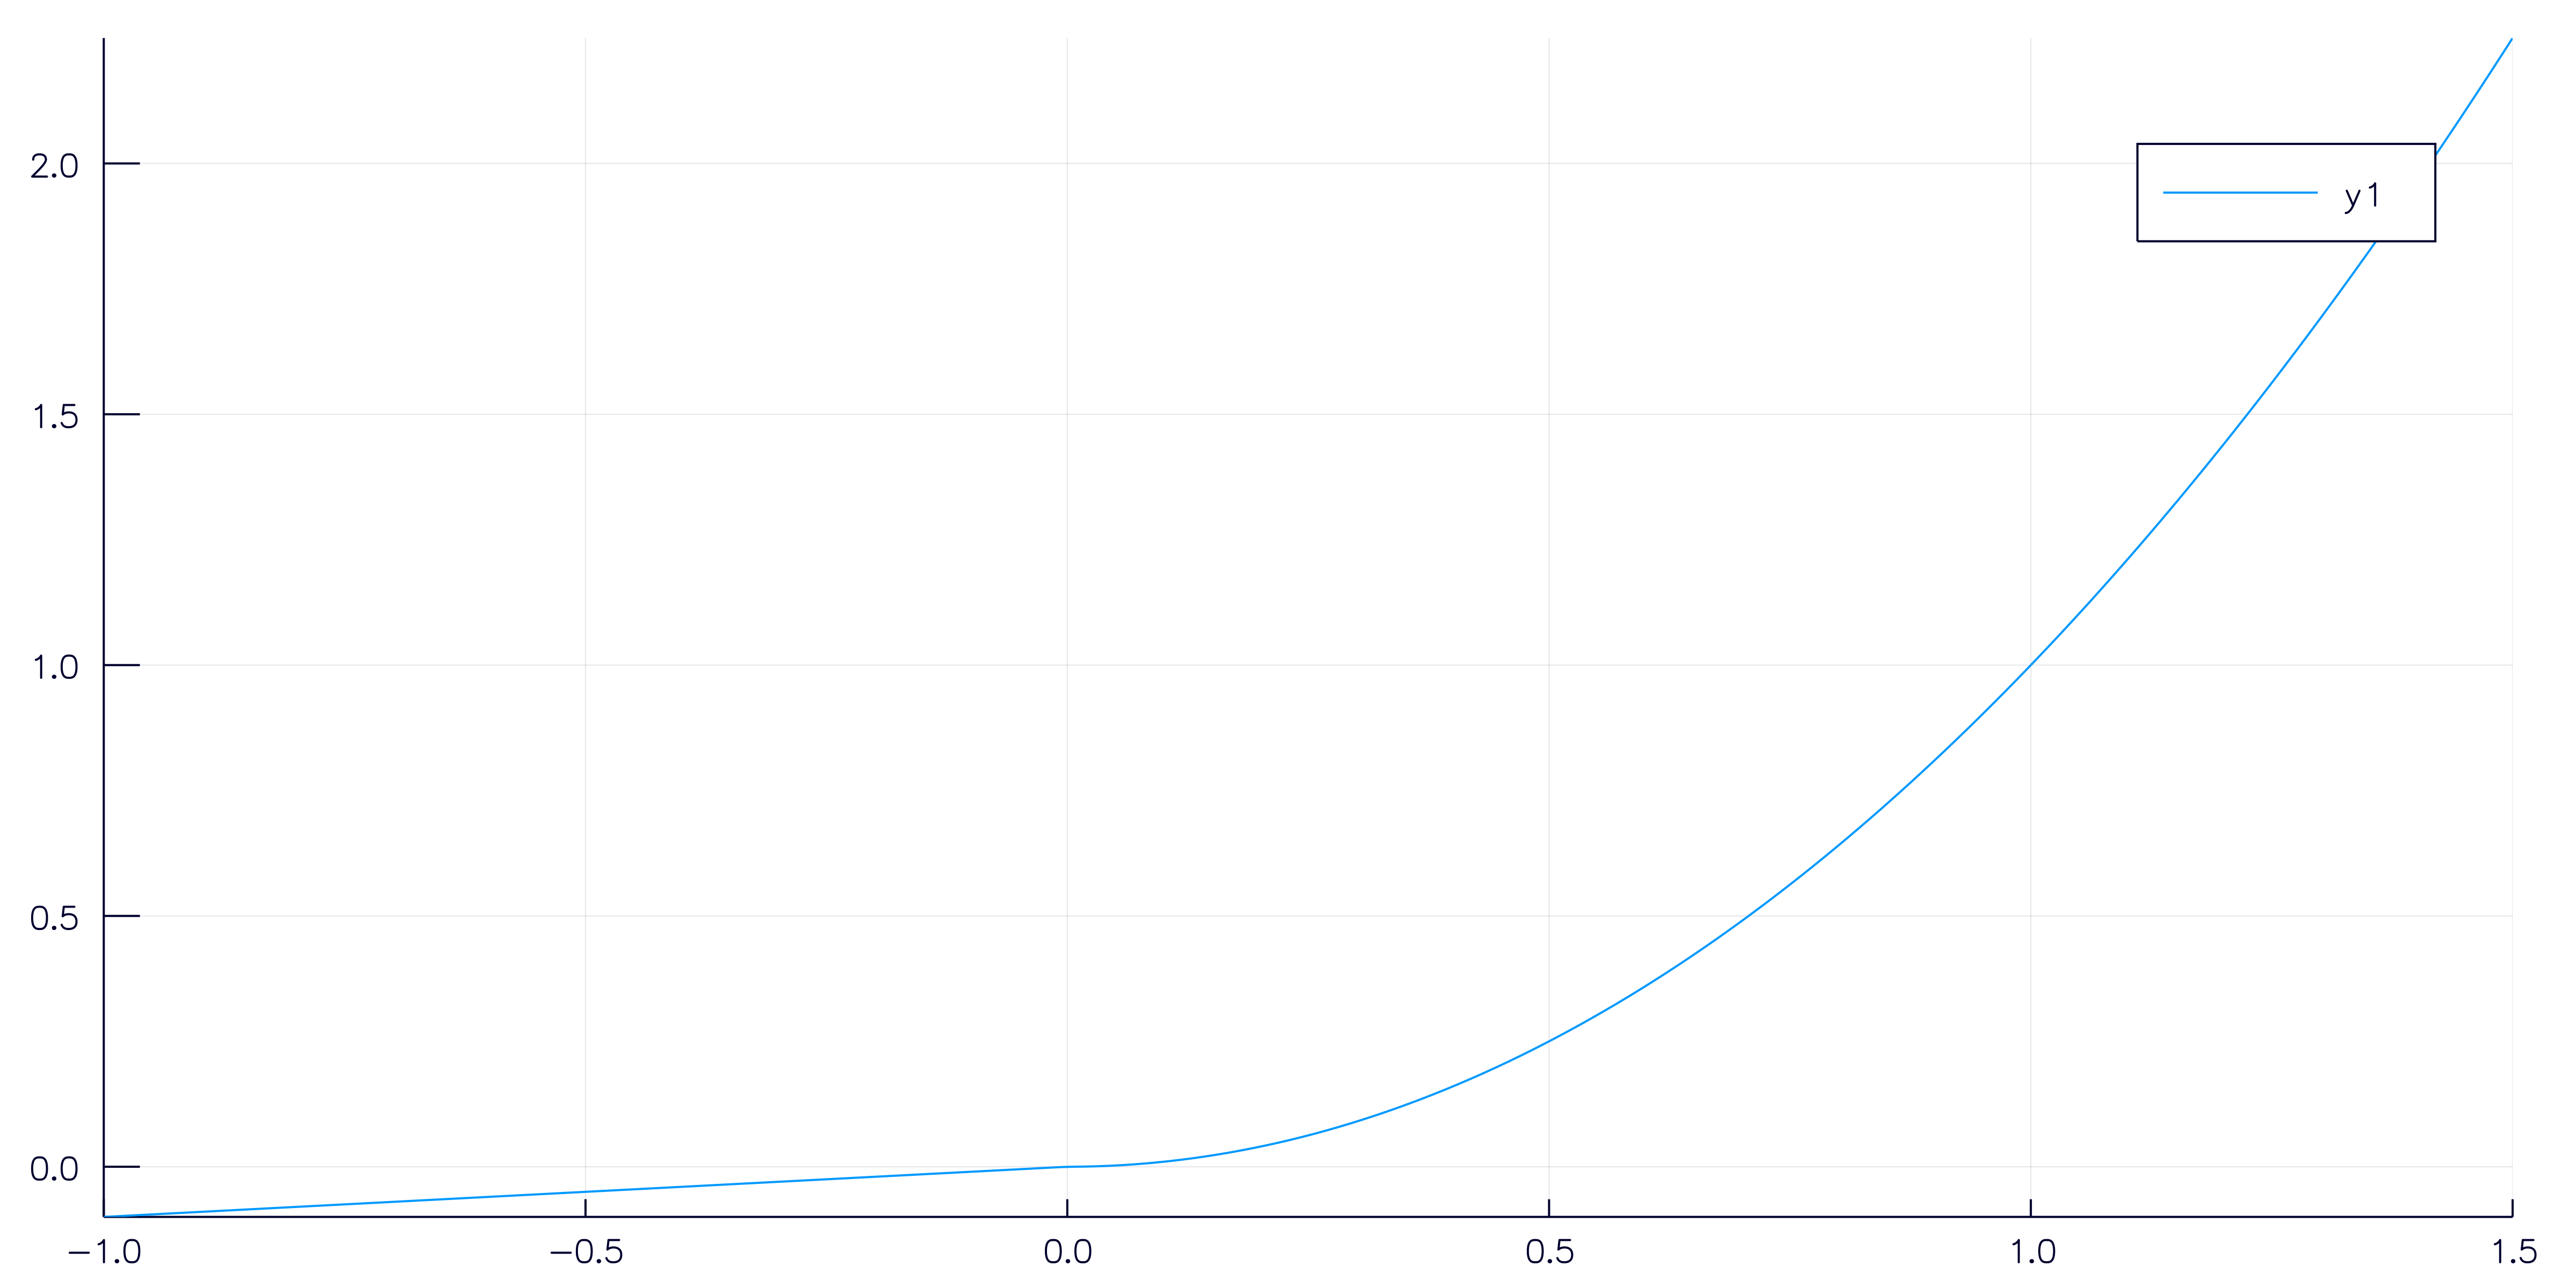

In [7]:
nonlinearity(u) = u < 0 ? 0.1u : u^2
plot(linspace(-1,1.5,200),nonlinearity)

Try tuning a P-controller for the system with the input nonlinearity. Is it possible to achieve an okay result?

In [26]:
tspan = (0.,30.)
t = 0:h:30
x0 = [0,0,5/2]
conditions  = [(x,y,r) -> true]
reference(t,x) = t < 15 ? 0. : 1.
@manipulate for kp = slider(linspace(0,20,50), label="kp", value=5),
    ki = slider(linspace(0,20,50), label="ki", value=1),
    kd = slider(linspace(0,20,50), label="kd", value=1)
    controllers = [pid(kp=kp, ki=ki, kd=kd)]
    global gs, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=u->nonlinearity.(u))
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, gs.y(t, sol2)[:], lab="PI controller")
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5))
end

(div
  (div)
  (div)
  (div)
  (WebIO.Widget("context-135", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_92", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 780.315,377.923 780.315,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"742\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  286.201,377.923 286.201,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  533.258,377.923 533.258,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,286.395 780.315,286.395 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,194.867 780.315,194.867 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,103.339 780.315,103.339 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  286.201,377.923 286.201,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  533.258,377.923 533.258,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 50.2612,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,286.395 50.2612,286.395 \n  \"/>\n<polyline clip-path=\"url(#

Once again, we try a controller with gain scheduling. The left plot displays the control signal of the two controllers. You may find it necessary to add a derivative part in the controller.

In [28]:
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=2),
                ki1 = slider(linspace(0,20,50), label="ki1", value=1),
                kp2 = slider(linspace(0,10,50), label="kp2", value=2),
                ki2 = slider(linspace(0,20,50), label="ki2", value=1),
                th  = linspace(0,1,20)
    
    # kp1,ki1,kp2,ki2,th = 1,1,1,1,0.5
    global gs, sol3
    plot(t, gs.y(t, sol2)[:], lab="PI controller", layout=2)

    controllers  = ss.([pid(kp=kp1, ki=ki1), pid(kp=kp2, ki=ki2)])
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=u->nonlinearity.(u))
    sol3         = solve(gs2, x0, tspan, Tsit5(), reltol=1e-4, abstol=1e-4)

    # Plotting
    U  = hcat(sol3.u...)
    x  = [[u[1],u[2],u[3]] for u in sol3.u]
    u1 = controllers[1].C*U[3,:]' + controllers[1].D.*hcat((gs2.e.(sol3.t, x))...)
    u2 = controllers[2].C*U[4,:]' + controllers[2].D.*hcat((gs2.e.(sol3.t, x))...)
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(0,1.5), subplot=1)
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5), subplot=1)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash, subplot=1)
    plot!([u1[:] u2[:]], lab=["u_1" "u_2"], subplot=2)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-150", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_104", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 380.315,377.923 380.315,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"342\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  152.867,377.923 152.867,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  266.591,377.923 266.591,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  380.315,377.923 380.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 380.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,286.395 380.315,286.395 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,194.867 380.315,194.867 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,103.339 380.315,103.339 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 380.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 380.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  152.867,377.923 152.867,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  266.591,377.923 266.591,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  380.315,377.923 380.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 44.2612,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,286.395 44.2612,286.395 \n  \"/>\n<polyline 

- Can you manage to get a gain scheduled controller that is better than the simple PI controller?
- Do you notice any issues with the implementation of the gain scheduling?
- How do you resolve any issues you can think of? 

To get a better feeling for the practicalities of gain scheduling, you'll be asked to implement a simple gain scheduled controller with interpolation below. We consider the same process and nonlinearity as above, but this time we'll implement two P-controllers and an interpolation region.
1. Define two threshold values $t_1$ and $t_2$, between which you interpolate the value of the control signal requested by the two controllers.
2. Figure out the equations for linear interpolation between the thresholds, you have two candidate control signals $u_1,u_2$, what is the control signal to output in the following cases, where $p$ is the scheduling signal?
    1. $p < t_1$
    2. $t_1 \leq p < t_2$
    3. $p \leq t_2$
Add the interpolation logic to the controller below.

In [33]:
Tf             = 50                 # Length of experiments (seconds)
t              = 0:h:Tf             # Time vector
reference(t,x) = t < Tf÷2 ? 0. : 1. # Reference generator (step function)
s              = Simulator(Ps)
x0             = [0.,0,5/2]         # Initial state
tspan          = (0.0,Tf)

@manipulate for K = linspace(0,20,50), K1 = linspace(0,20,50), K2 = linspace(0,20,50)
    # P controller
    os  = OutputFeedbackSimulator(Ps,reference,e->K*e)
    sol = solve(os, x0, tspan, Tsit5()) # Simulate the system
    
    # GS controller
    function controller(t,x)
        y  = Ps.C*x # Form measurement signal
        e  = reference(t,x) .- y
        u1 = K1*e
        u2 = K2*e+1
        
        u  = (u1+u2) / 2 # Implement the interpolation here! <-----------------------------

        u
    end
    
    s    = Simulator(Ps,controller)
    solg = solve(s, x0, tspan, Tsit5()) # Simulate the system
    plot(t, os.y(t, sol)[:], lab="P controller", layout=2)
    plot!(t, s.y(t, solg)[:], lab="GS controller", subplot=1)
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5), subplot=1)
    plot!(t, [controller(t,solg(t))[] for t ∈ t], title="u", subplot=2)
end

(div
  (div)
  (div)
  (div)
  (WebIO.Widget("context-187", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_127", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 381.962,377.923 381.962,31.4961 39.1436,31.4961 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"31\" width=\"343\" height=\"347\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  107.707,377.923 107.707,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  176.271,377.923 176.271,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  244.835,377.923 244.835,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  313.399,377.923 313.399,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  381.962,377.923 381.962,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 381.962,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,291.316 381.962,291.316 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,204.71 381.962,204.71 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,118.103 381.962,118.103 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,31.4961 381.962,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 381.962,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  107.707,377.923 107.707,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  176.271,377.923 176.271,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  244.835,377.923 244.835,372.727 \n  \"/>\n<polyline clip-

ErrorException: [91mSolution interpolation cannot extrapolate past the final timepoint. Either solve on a longer timespan or use the local extrapolation from the integrator interface.[39m

ErrorException: [91mSolution interpolation cannot extrapolate past the final timepoint. Either solve on a longer timespan or use the local extrapolation from the integrator interface.[39m

ErrorException: [91mSolution interpolation cannot extrapolate past the final timepoint. Either solve on a longer timespan or use the local extrapolation from the integrator interface.[39m

You can add sliders for $t_1$ and $t_2$ to make experimentation faster.

Tuning a gain schedule and the parameters of the scheduled controllers can become very tedious. Even more so it the process time constant is long and one does not have a simulator. A more systematic apporach is to linearize the system around two different operating points and design a well-damped controller for both linear systems. One then chooses a threshold somewhere between the operating points. Linearize the system around two operating points, you can do this either manually or with the help of the computer. The process model on statespace form is given by:

In [20]:
Ps

StateSpace:
A = 
          x1      x2      x3 
  x1   -1.2    -0.45   -0.2  
  x2    1.0     0.0     0.0  
  x3    0.0     0.25    0.0  
B = 
         u1 
  x1   0.5  
  x2   0.0  
  x3   0.0  
C = 
         x1     x2     x3 
  y1   0.0    0.0    0.4  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model

After having linearized the system, modify the controller implementation above to get a better behaviour in a large part of the workspace.